a) 
  - Weights chosen randomly from uniform distribution between -10 and 10.  
  - Learning rate = 0.1.
  - The algorithms runs at least 100 times, and will stop if the sum of the absolute value  of the gradient is very close to zero (less than 0.000001). The iterations is printed after the algorithm finishes running and is usually between 3,000 - 4,000 times.
  - Final weight vector (soln): [-1.82306627  0.56127303].  

b)

Learning rate               : 0.1


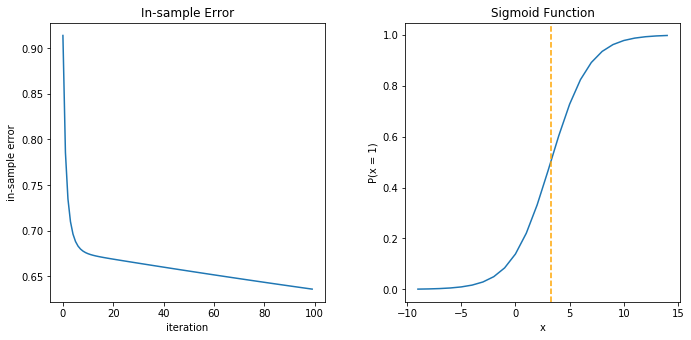

In [3]:
from math import e, pow, log
import numpy as np
import matplotlib.pyplot as plt


def main():
    x, y = get_x_y()
    w = np.random.uniform(-10, 10, x.shape[1])

    min_iterations = 100
    eta = 0.1
    t = 200000

    ein = []

    for i in range(t):
        if i < min_iterations:
            ein.append(insample_error(w, x, y))

        g = calculate_gradient(w, x, y)
        w = w - eta * g

        if np.sum(np.absolute(g)) < 0.000001 and i > min_iterations:
            break
    
    print('{:28s}: {}'.format('Learning rate', eta))
    
    plot_exp(ein, w)


def get_logistic_probs(w, x):
    probs = []
    for this_x in x:
        prob = logistic_fn(w, this_x)
        probs.append(prob)
    return probs


def get_predictions(w, x):
    preds = []
    for this_x in x:
        pred = round(logistic_fn(w, this_x))
        preds.append(pred)
    return [pred if pred > 0 else -1 for pred in preds]


def plot_exp(ein, w):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10.0, 5.0))
    f.canvas.set_window_title('Logistic Regression')
    plt.tight_layout(pad=3.0, w_pad=5.0, h_pad=4.0)

    # axes 1
    x_ein = np.array(range(0, len(ein)))
    ax1.set(title='In-sample Error',
            xlabel='iteration',
            ylabel='in-sample error',
            )
    ax1.plot(x_ein, ein)

    # axes 2
    midpoint = 3.25  # where P(x = 1) = 0.5
    x = range(round(midpoint) - 12, round(midpoint) + 12)
    probs = get_logistic_probs(w, add_bias(x))
    ax2.set(title='Sigmoid Function',
            xlabel='x',
            ylabel='P(x = 1)'
            )
    ax2.plot(x, probs)
    ax2.axvline(midpoint, color='orange', ls='--')
    plt.show()


def get_x_y():
    data = np.genfromtxt('training_data.csv', delimiter=',', dtype='int32')
    x, y = data[:, 0], data[:, 1]
    return add_bias(x), [y if y == 1 else -1 for y in y]


def add_bias(x):
    return np.column_stack((np.ones_like(x), x))  # Let x0 equal 1


def calculate_gradient(w, x, y):
    gradient_sum = 0
    for this_x, this_y in zip(x, y):
        gradient_sum += partial_gradient(w, this_x, this_y)
    return - (gradient_sum / x.shape[0])


def partial_gradient(w, x, y):
    return (y * x) / (1 + pow(e, y * (np.dot(w, x))))


def logistic_fn(w, x):
    s = np.dot(w, x)
    return pow(e, s) / (1 + pow(e, s))


def insample_error(w, x, y):
    sum = 0
    for this_x, this_y in zip(x, y):
        sum += pt_error(w, this_x, this_y)
    return sum / x.shape[0]


def pt_error(w, x, y):
    return log(1 + pow(e, -y * np.dot(w, x)))


if __name__ == '__main__':
    main()
